<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
# default_exp utils.plot

In [ ]:
# export
import numpy as np
import matplotlib

matplotlib.use("Agg")
import matplotlib.pyplot as plt


def save_figure_to_numpy(fig):
    """Save figure to a numpy array."""
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep="")
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return data


def plot_spectrogram(mel):
    figure = plt.figure()
    plt.xlabel("Spectrogram frame")
    plt.ylabel("Channel")
    plt.imshow(mel, aspect="auto", origin="lower", interpolation="none", cmap="inferno")
    figure.canvas.draw()
    return figure

/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/zwf/miniconda3/envs/uber

In [ ]:
%matplotlib inline

/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


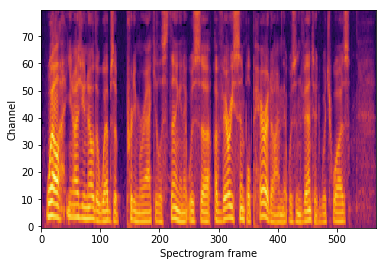

In [ ]:
import torch

mel = torch.load("test/fixtures/stevejobs-1.pt")
figure = plot_spectrogram(mel)
numpy_figure = save_figure_to_numpy(figure)

plt.show()
# numpy_figure

In [ ]:
# export


def plot_attention(attention):
    figure = plt.figure()
    plt.xlabel("Decoder timestep")
    plt.ylabel("Encoder timestep")
    plt.imshow(
        attention.data.cpu().numpy(),
        aspect="auto",
        origin="lower",
        interpolation="none",
        cmap="inferno",
    )
    figure.canvas.draw()
    return figure


def plot_gate_outputs(gate_targets, gate_outputs):
    figure = plt.figure()
    plt.xlabel("Frames")
    plt.ylabel("Gate state")
    ax = figure.add_axes([0, 0, 1, 1])
    ax.scatter(
        range(gate_targets.size(0)),
        gate_targets,
        alpha=0.5,
        color="green",
        marker="+",
        s=1,
        label="target",
    )
    ax.scatter(
        range(gate_outputs.size(0)),
        gate_outputs,
        alpha=0.5,
        color="red",
        marker=".",
        s=1,
        label="predicted",
    )
    figure.canvas.draw()
    return figure

/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


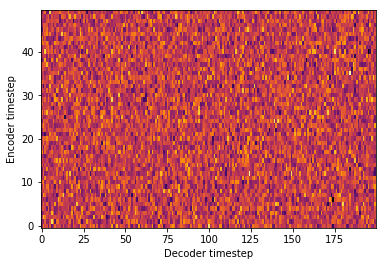

In [ ]:
fig = plot_attention(torch.randn(50, 200))
numpy_figure = save_figure_to_numpy(fig)
# from PIL import Image as im
#
# im.fromarray(numpy_figure)

/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


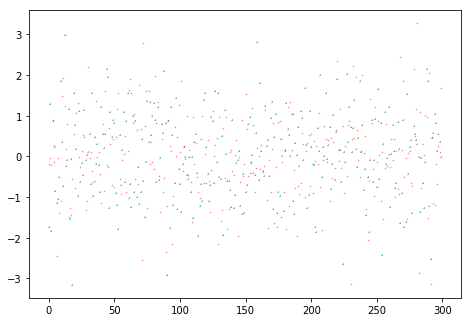

In [ ]:
fig = plot_gate_outputs(torch.randn(300), torch.randn(300))
numpy_figure = save_figure_to_numpy(fig)
# im.fromarray(numpy_figure)

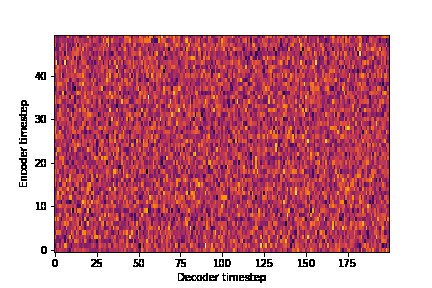